# Model analysis

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
with open('../group.json') as f:
    data = json.load(f)
    ocrnet = pd.DataFrame(data['ocrnet'])
    pointrend = pd.DataFrame(data['point_rend'])
    dmnet = pd.DataFrame(data['dmnet'])
    
df = pd.concat([ocrnet, pointrend, dmnet])

In [47]:
df.head()

,network,backbone,pretrained,aAcc,mDice,mAcc,data_time,time,step
0,OCRNet,HRNet,ade,85.19,8.24,9.31,0.033609,0.086956,1
1,OCRNet,HRNet,ade,89.88,9.76,9.08,0.017576,0.071249,2
2,OCRNet,HRNet,cityscapes,88.52,6.96,6.85,0.032560,0.137402,1
3,OCRNet,HRNet,cityscapes,89.25,7.23,6.72,0.046495,0.164720,2
4,OCRNet,Resnet,cityscapes,87.84,8.88,9.09,0.032881,0.097223,1


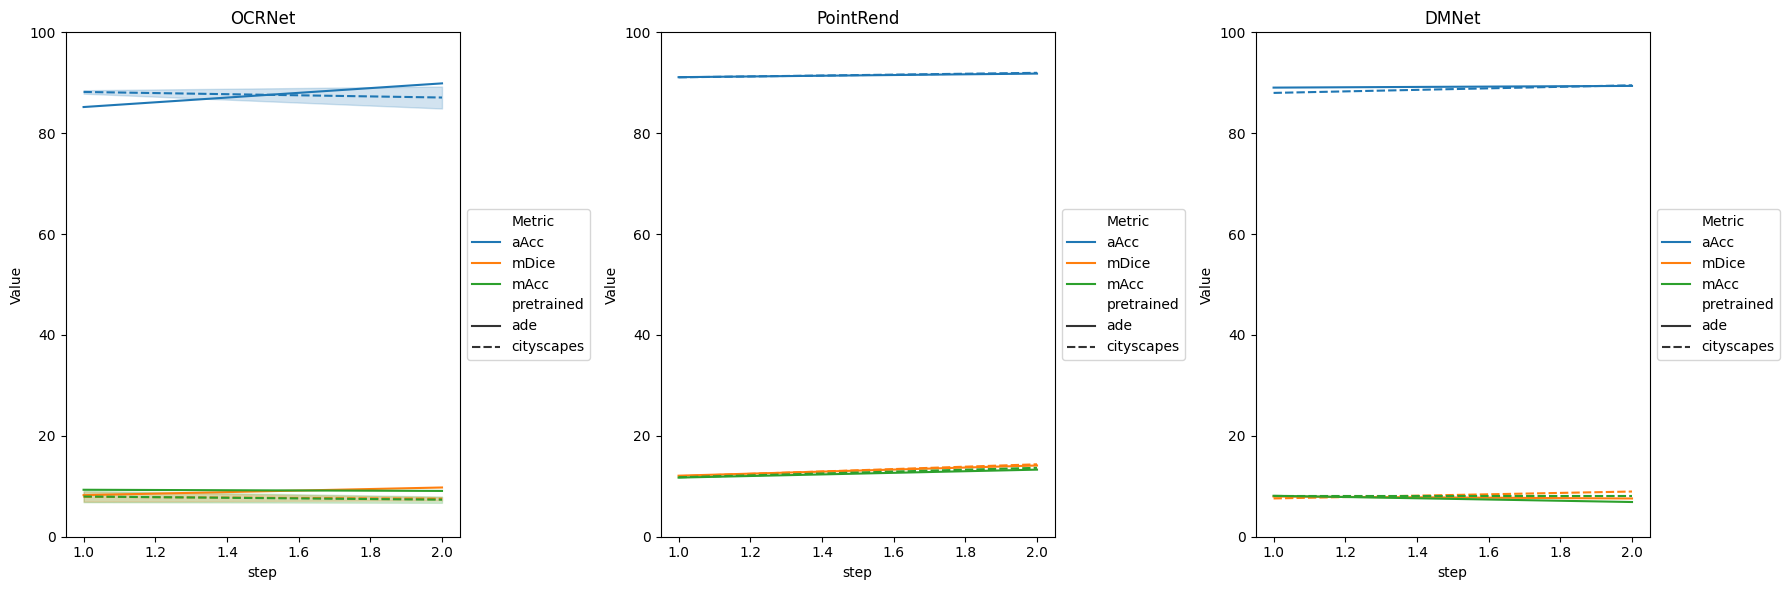

In [48]:
# Assuming you have already imported ocrnet, pointrend, and dmnet dataframes

# Melt the dataframes
ocrnet_melted = pd.melt(ocrnet, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')
pointrend_melted = pd.melt(pointrend, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')
dmnet_melted = pd.melt(dmnet, id_vars=['step', 'pretrained'], value_vars=['aAcc', 'mDice', 'mAcc'], var_name='Metric', value_name='Value')

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot using Seaborn
sns.lineplot(data=ocrnet_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[0])
ax[0].set_title("OCRNet")
ax[0].set_ylim(0, 100)

sns.lineplot(data=pointrend_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[1])
ax[1].set_title("PointRend")
ax[1].set_ylim(0, 100)

sns.lineplot(data=dmnet_melted, x='step', y='Value', hue='Metric', style="pretrained", ax=ax[2])
ax[2].set_title("DMNet")
ax[2].set_ylim(0, 100)

# Adjust legend
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show plot
plt.tight_layout()
plt.show()


# Batch size Analysis

In [50]:
with open('../group_batchsize.json') as f:
    data = json.load(f)

In [51]:
# Create an empty list to store data for the dataframe
df_list = []

# Loop through each key (batchsize) in the JSON data
for key, value in data.items():
  # For each value (list of dictionaries), append dictionaries with an extra column 'batchsize' set to the key
  for item in value:
    item['batchsize'] = key
    df_list.append(item)

# Create the dataframe from the list
df = pd.DataFrame(df_list)

# Print the dataframe
df.head()

,aAcc,mDice,mAcc,data_time,time,step,batchsize
0,91.11,12.10,11.72,0.018081,0.054526,1,2
1,91.82,14.12,13.30,0.016509,0.053082,2,2
2,92.04,16.11,15.22,0.033557,0.095723,3,2
3,92.09,15.72,14.74,0.016858,0.054110,4,2
4,91.14,12.15,11.11,0.014900,0.037200,1,4


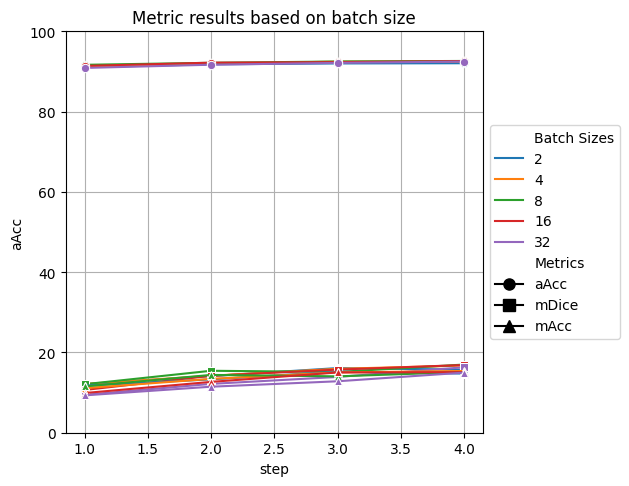

In [104]:
# Define the metrics you want to plot (replace with your desired columns)
metrics = ['aAcc', 'mDice', 'mAcc']

marker_styles = {'aAcc': 'o', 'mDice': 's', 'mAcc': '^'}

# Create a subplot for each metric

for metric, marker in zip(metrics, marker_styles.values()):
  sns.lineplot(x='step', y=metric, marker=marker, hue='batchsize', data=df)
  
# Create a custom legend
handles = []
labels = []
batch_sizes_seen = set()
handles.append(plt.Line2D([], [], color='black', marker='', linestyle='None', label='Batch Sizes'))
labels.append('Batch Sizes')
# Add batch sizes with colors to the legend
for batch_size, color in zip(df['batchsize'].unique(), sns.color_palette()):
    handles.append(plt.Line2D([], [], color=color, markersize=8, linestyle='-', label=batch_size))
    labels.append(batch_size)
    
handles.append(plt.Line2D([], [], color='black', marker='', linestyle='None', label='Metrics'))
labels.append('Metrics')
for batch_size, marker in marker_styles.items():
    if batch_size in batch_sizes_seen:
        continue
    handles.append(plt.Line2D([], [], color='black', marker=marker, markersize=8, linestyle='-'))
    labels.append(batch_size)
    batch_sizes_seen.add(batch_size)


plt.ylim(0, 100)
plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.title("Metric results based on batch size")
plt.grid()
plt.show()